<a href="https://colab.research.google.com/github/Sree-Vasini/chatgpt-usage-analysis/blob/main/chatgpt_usage_analysis_notebooks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas matplotlib


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("chatgptdata.csv")

# Show the data
df


,Number,Conversation Title,Main Category,Date (approx),Purpose,Time Saved (min),Used Output?
0,1,Startup company,startups,14/1/2026,Jobs,15 mins,YES
1,2,ATS Resume,ATS,23/1/2026,ATS Score,20 mins,YES
2,3,Day Plan,Study,20/1/2026,Studying,15 mins,YES
3,4,Best Job Application time,Time To apply,29/12/2025,Jobs,6 mins,Yes
4,5,Dressing Style,Dressing,27/12/2025,Styling,5 mins,NO
5,6,Therapy Talk,Threapy,21/12/2025,Talk,30 mins,YES
6,7,Email Draft,Emails,17/11/2025,Drafts,10 mins,YES
7,8,Cooking Meals,Receipe,19/10/2025,Cooking,0 mins,NO
8,9,Github Project Guide,Guide,15/08/2025,Project,30 mins,YES
9,10,Editing Image,Edit,17/11/2025,Image Edit,18 mins,NO


In [3]:
# Check dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Number              10 non-null     int64 
 1   Conversation Title  10 non-null     object
 2   Main Category       10 non-null     object
 3   Date (approx)       10 non-null     object
 4   Purpose             10 non-null     object
 5   Time Saved (min)    10 non-null     object
 6   Used Output?        10 non-null     object
dtypes: int64(1), object(6)
memory usage: 692.0+ bytes


In [6]:
# Total time saved
total_time_saved = df["Time Saved (min)"].sum()

print("Total Time Saved:", total_time_saved, "minutes")


Total Time Saved: 15 mins20 mins15 mins6 mins5 mins30 mins10 mins0 mins30 mins18 mins minutes


In [8]:
# Count conversations by category
category_counts = df["Main Category"].value_counts()

print(category_counts)


Main Category
startups         1
ATS              1
Study            1
Time To apply    1
Dressing         1
Threapy          1
Emails           1
Receipe          1
Guide            1
Edit             1
Name: count, dtype: int64


In [18]:
df["Time Saved"] = df["Time Saved (min)"].str.replace("mins", "")
df["Time Saved"] = pd.to_numeric(df["Time Saved"])


In [19]:
avg_time_saved = df["Time Saved"].mean()
print("Average Time Saved per Chat:", round(avg_time_saved, 2), "minutes")


Average Time Saved per Chat: 14.9 minutes


In [24]:
# Rename column to a standard name
df = df.rename(columns=lambda x: x.strip())

df = df.rename(columns={
    "category": "Category",
    "CATEGORY": "Category"
})


In [27]:
total_time = df["Time Saved"].sum()
average_time = df["Time Saved"].mean()

print("Total Time Saved:", total_time, "minutes")
print("Average Time Saved per Chat:", round(average_time, 2), "minutes")



Total Time Saved: 149 minutes
Average Time Saved per Chat: 14.9 minutes


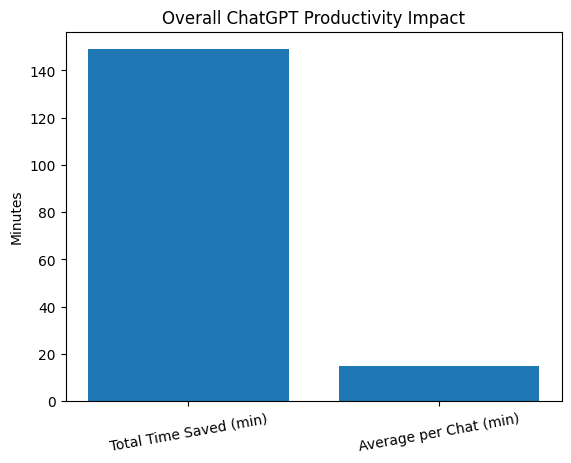

In [28]:
import matplotlib.pyplot as plt

metrics = {
    "Total Time Saved (min)": total_time,
    "Average per Chat (min)": average_time
}

plt.bar(metrics.keys(), metrics.values())

plt.title("Overall ChatGPT Productivity Impact")
plt.ylabel("Minutes")
plt.xticks(rotation=10)
plt.show()
